In [2]:
import pandas as pd
import numpy as np
import os

from scipy.stats import f_oneway
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

from utils.CaImageCSV import CaImageCSV
from utils.CalculateEventRate import CalculateEventRate
import utils.sulfur.constant as const

In [3]:
animal_names = const.ANIMAL_NAMES

In [ ]:
spike_heights = np.array([])
for animal_name in animal_names:
    for context_name in const.CONTEXTS:
        csv_file_path = './resources/spikes_data/%s/%s_%s.csv' % (animal_name, animal_name, context_name)
        df = pd.read_csv(csv_file_path, header=[0], index_col=[0, 1], low_memory=False)
        
        spike_heights = np.append(spike_heights, df.to_numpy().flatten())
spike_heights

In [ ]:
def show_hist_for_spike_height(spike_height, title=None):
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    
    hist_range = (0, 5)
    bins = 100
    weights = np.ones(len(spike_height)) / len(spike_height)
    xlabel = 'Height of spikes'
    axes[0].hist(spike_height, range=hist_range, bins=bins, weights=weights, ec='navy')
    axes[1].hist(spike_height, range=hist_range, bins=bins, weights=weights, ec='navy', cumulative=True)
    
    axes[0].set_xlabel(xlabel)
    axes[1].set_xlabel(xlabel)
    
    if title is not None:
        axes[0].set_title(title)
        axes[1].set_title(title + ' (cumulative)')
    axes[0].yaxis.set_major_formatter(PercentFormatter(1))
    axes[1].yaxis.set_major_formatter(PercentFormatter(1))
    # plt.show()
    
    os.makedirs('./resources/spike_height/hist/', exist_ok=True)
    plt.savefig('./resources/spike_height/hist/%s' % title)

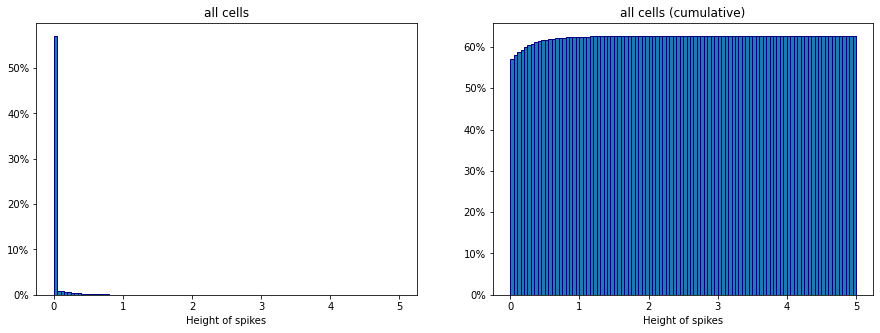

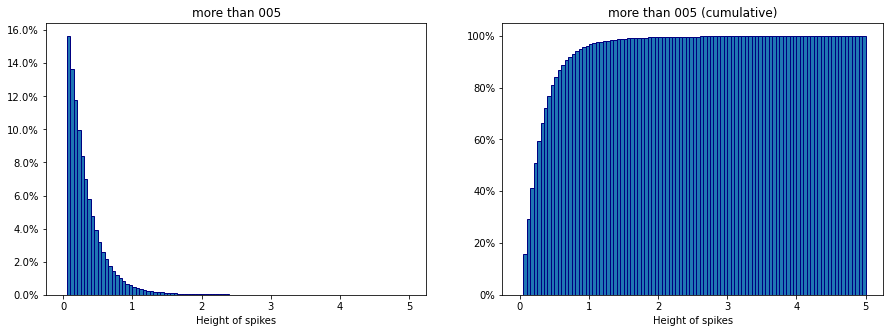

In [36]:
show_hist_for_spike_height(spike_heights, title='all cells')
show_hist_for_spike_height(spike_heights[spike_heights >= 0.05], title='more than 005')